<a href="https://colab.research.google.com/github/RendiZein/Metode-Rekayasa-Komputasi/blob/main/RK_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necesarry library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import timedelta

# Main code

Improvement :
1. Rapikan setiap fungsi dengan membuat fungsi yang terdapat option untuk menampilkan grafik atau tidak
2. Ganti y_p dengan y

## Nomor 7

Analsisis :
1. RK 4 memiliki nilai

### bagian a


In [11]:
def rk_o2_ordinary_differential_equations_single_order_1(dt=0.02,pr=2):
  #defined variable
  start_time = time.monotonic()
   #delta time
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y=np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y[j])#calculate k1
      k2[j+1]=f(t[j+1], y[j]+k1[j+1]*dt)#calculate k2
      y[j+1]=y[j]+(k1[j+1]+k2[j+1])*dt/2#calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y, e, delta_time
  else:
    df = pd.DataFrame(list(zip(t, y_t,y,e,k1,k2)),
                  columns =['t','y true','y pred','error(%)','k1','k2'])
    display(df)
    plt.plot(t, y, '0.8', label='Euler Method')
    plt.plot(t, y_t, 'k', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

,t,y true,y pred,error(%),k1,k2
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000
1,0.02,4.940596,4.940600,0.000081,-3.000000,-2.940000
2,0.04,4.882368,4.882376,0.000160,-2.940600,-2.881788
3,0.06,4.825294,4.825305,0.000238,-2.882376,-2.824729
4,0.08,4.769349,4.769364,0.000314,-2.825305,-2.768799
5,0.10,4.714512,4.714531,0.000390,-2.769364,-2.713977
6,0.12,4.660761,4.660783,0.000464,-2.714531,-2.660240
7,0.14,4.608075,4.608099,0.000536,-2.660783,-2.607567
8,0.16,4.556431,4.556459,0.000608,-2.608099,-2.555937
9,0.18,4.505811,4.505841,0.000677,-2.556459,-2.505330


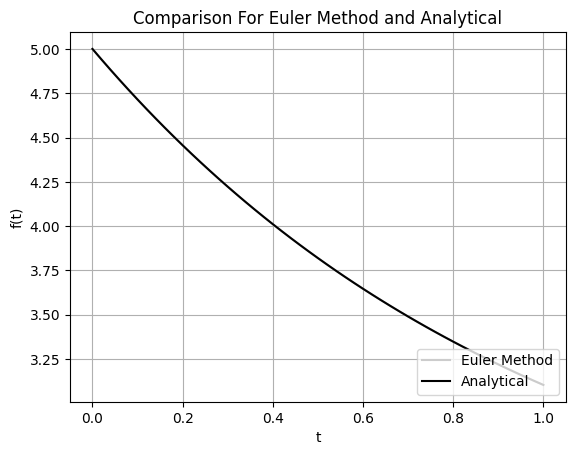

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001415


In [12]:
rk_o2_ordinary_differential_equations_single_order_1(dt=0.02,pr=2)

### Bagian B

In [13]:
def rk_o4_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
  start_time = time.monotonic()
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  k4=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y=np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y[j])#calculate k1
      k2[j+1]=f(t[j]+dt/2, y[j]+k1[j+1]*dt/2)#calculate k2
      k3[j+1]=f(t[j]+dt/2, y[j]+k2[j+1]*dt/2)#calculate k2#calculate k3
      k4[j+1]=f(t[j+1], y[j]+k3[j+1]*dt)#calculate k2#calculate k3#calculate k4
      y[j+1]=y[j]+(k1[j+1]+2*k2[j+1]+2*k3[j+1]+k4[j+1])*dt/6 #calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y,e
  else:
    df = pd.DataFrame(list(zip(t,y_t,y,e,k1,k2,k3,k4)),
                  columns =['t','y true','y pred','error(%)','k1','k2','k3','k4'])
    display(df)
    plt.plot(t, y, '0.8', label='RKO4 Method')
    plt.plot(t, y_t, 'k', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

,t,y true,y pred,error(%),k1,k2,k3,k4
0,0.00,5.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,0.02,4.940596,4.940596,1.613863e-09,-3.000000,-2.970000,-2.970300,-2.940594
2,0.04,4.882368,4.882368,3.201531e-09,-2.940596,-2.911190,-2.911484,-2.882366
3,0.06,4.825294,4.825294,4.762887e-09,-2.882368,-2.853545,-2.853833,-2.825292
4,0.08,4.769349,4.769349,6.297765e-09,-2.825294,-2.797041,-2.797323,-2.769347
5,0.10,4.714512,4.714512,7.806078e-09,-2.769349,-2.741656,-2.741932,-2.714510
6,0.12,4.660761,4.660761,9.287704e-09,-2.714512,-2.687367,-2.687639,-2.660759
7,0.14,4.608075,4.608075,1.074254e-08,-2.660761,-2.634154,-2.634420,-2.608073
8,0.16,4.556431,4.556431,1.217048e-08,-2.608075,-2.581994,-2.582255,-2.556430
9,0.18,4.505811,4.505811,1.357145e-08,-2.556431,-2.530867,-2.531123,-2.505809


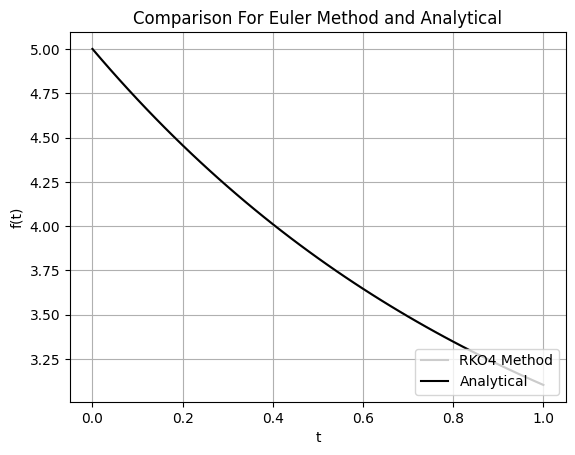

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.000900


In [14]:
rk_o4_ordinary_differential_equations_single_order_1(dt=0.02, pr=2)

### Bagian C

#### additional function

##### RK Orde 2

In [ ]:
def rk_o2(dt=0.02):
  #defined variable
  start_time = time.monotonic()
   #delta time
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y_p=np.zeros(len(t))
  e=np.zeros(len(t))
  y_p[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y_p[j])#calculate k1
      k2[j+1]=f(t[j+1], y_p[j]+k1[j+1]*dt)#calculate k2
      y_p[j+1]=y_p[j]+(k1[j+1]+k2[j+1])*dt/2#calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
  return y_p, y_t, e, t


##### RK Orde 4

In [ ]:
def rk_o4(dt=0.02):
  #defined variable
  start_time = time.monotonic()
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  k4=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y_p=np.zeros(len(t))
  e=np.zeros(len(t))
  y_p[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y_p[j])#calculate k1
      k2[j+1]=f(t[j]+dt/2, y_p[j]+k1[j+1]*dt/2)#calculate k2
      k3[j+1]=f(t[j]+dt/2, y_p[j]+k2[j+1]*dt/2)#calculate k2#calculate k3
      k4[j+1]=f(t[j+1], y_p[j]+k3[j+1]*dt)#calculate k2#calculate k3#calculate k4
      y_p[j+1]=y_p[j]+(k1[j+1]+2*k2[j+1]+2*k3[j+1]+k4[j+1])*dt/6 #calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
  return y_p,e

##### Euler Modified Single

In [ ]:
def euler_modified_single(delta_t=0.1, er=1.):
    start_time = time.monotonic()
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/delta_t)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y_p=np.zeros(len(t))
    e = np.zeros(len(t))
    k = np.zeros(len(t))
    y_p[0]=y_t[0]=5
    k[0]=0
    e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100

    #looping
    for j in range(len(t)-1):
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_k
        e[j+1]=1 #inisiasi untuk mencegah error
        yk = [y_p[j]+f(t[j], y_p[j])*delta_t] # inisiasi y korektor
        e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100 # inisiasi error untuk y kor pertama
        while e[j+1]>er:
          yk.append(y_p[j]+(f(t[j], y_p[j])+f(t[j+1], yk[-1]))*delta_t*0.5)
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100

        k[j+1]=len(yk)-1
        y_p[j+1]=yk[-1]

        #calculate error
        e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
    return y_p, e

##### Euler Single

In [ ]:
#defined variable
def euler_single(delta_t=0.1):
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/delta_t)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y_p=np.zeros(len(t))
    e = np.zeros(len(t))
    y_p[0]=y_t[0]=5
    e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
    #looping
    for j in range(len(t)-1):
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_pred
        y_p[j+1]=y_p[j]+f(t[j], y_p[j])*delta_t
        #calculate error
        e[j+1]=(np.abs(y_p[j+1]-y_t[j+1])/y_t[j+1])*100
    return y_p, e


#### Perbandingan

In [ ]:
yp_ems, e_ems=euler_modified_single(delta_t=0.02, er=1.)
yp_es, e_es=euler_single(delta_t=0.02)
yp_rko2, y_t, e_rko2, t =rk_o2(dt=0.02)
yp_rko4, e_rko4 = rk_o4(dt=0.02)

In [ ]:
df = pd.DataFrame(list(zip(t, y_t, yp_ems, e_ems, yp_es, e_es, yp_rko2,e_rko2, yp_rko4, e_rko4)),
              columns =['t', 'y_t','yp_ems','e_ems', 'yp_es','e_es', 'yp_rko2','e_rko2','yp_rko4', 'e_rko4'])
display(df)

,t,y_t,yp_ems,e_ems,yp_es,e_es,yp_rko2,e_rko2,yp_rko4,e_rko4
0,0.00,5.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000e+00
1,0.02,4.940596,4.940000,0.012064,4.940000,0.012064,4.940600,0.000081,4.940596,1.613863e-09
2,0.04,4.882368,4.881200,0.023929,4.881200,0.023929,4.882376,0.000160,4.882368,3.201531e-09
3,0.06,4.825294,4.823576,0.035596,4.823576,0.035596,4.825305,0.000238,4.825294,4.762887e-09
4,0.08,4.769349,4.767104,0.047062,4.767104,0.047062,4.769364,0.000314,4.769349,6.297765e-09
5,0.10,4.714512,4.711762,0.058328,4.711762,0.058328,4.714531,0.000390,4.714512,7.806078e-09
6,0.12,4.660761,4.657527,0.069391,4.657527,0.069391,4.660783,0.000464,4.660761,9.287704e-09
7,0.14,4.608075,4.604377,0.080253,4.604377,0.080253,4.608099,0.000536,4.608075,1.074254e-08
8,0.16,4.556431,4.552289,0.090911,4.552289,0.090911,4.556459,0.000608,4.556431,1.217048e-08
9,0.18,4.505811,4.501243,0.101366,4.501243,0.101366,4.505841,0.000677,4.505811,1.357145e-08


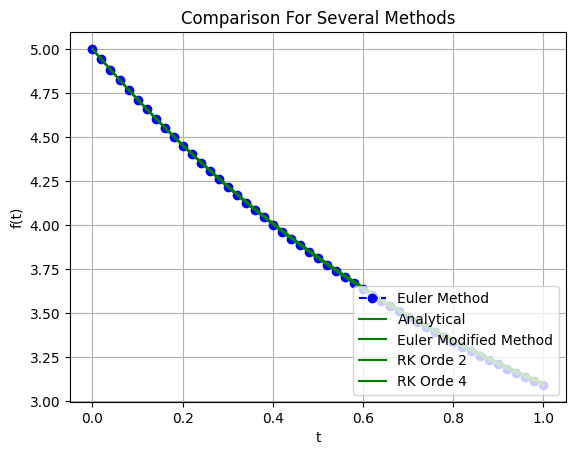

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001921


In [ ]:
plt.plot(t, yp_es, 'bo--', label='Euler Method')
plt.plot(t, y_t, 'g', label='Analytical')
plt.plot(t, yp_ems, 'g', label='Euler Modified Method')
plt.plot(t, yp_rko2, 'g', label='RK Orde 2')
plt.plot(t, yp_rko4, 'g', label='RK Orde 4')

plt.title('Comparison For Several Methods')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

## Nomor 8
Improvement :
1. gambar grafik pada setiap metode (a,b,c)
2. Cek kemabli fungsi rk orde 4 orde 1 (aman) simultan

### bagian a

In [ ]:
start_time = time.monotonic()
f1=lambda t, y1,y2 : 1-y1+y2
f2=lambda t, y1, y2 : 1+y1-y2
t_0=0
t_end=1
dt=0.02
H = int((t_end-t_0)/dt)
t=np.linspace(t_0, t_end, H+1)
y1 = np.zeros(len(t))
y2 = np.zeros(len(t))
k11 = np.zeros(len(t))
k21 = np.zeros(len(t))
k12 = np.zeros(len(t))
k22 = np.zeros(len(t))
k11
k11[0]=k21[0]=k12[0]=k22[0]=y1[0]=y2[0]= 0
for j in range(len(t)-1):
    #calculate y_pred
    k11[j+1]=f1(t[j],y1[j], y2[j])#calculate k11
    k21[j+1]=f2(t[j],y1[j], y2[j])#calculate k11
    k12[j+1]=f1(t[j+1], y1[j]+k11[j+1]*dt, y2[j]+k21[j+1]*dt)#calculate k12
    k22[j+1]=f2(t[j+1], y1[j]+k11[j+1]*dt, y2[j]+k21[j+1]*dt)#calculate k22
    y1[j+1]=y1[j]+(k11[j+1]+k12[j+1])*dt/2#calculate y_pred 1
    y2[j+1]=y2[j]+(k21[j+1]+k22[j+1])*dt/2#calculate y_pred 2

end_time = time.monotonic()
delta_time=timedelta(seconds=end_time - start_time)
df = pd.DataFrame(list(zip(t, y1, y2, k11, k21, k12, k22)),
                columns =['t','y1', 'y2', 'k11','k21','k12', 'k22'])
display(df)



,t,y1,y2,k11,k21,k12,k22
0,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,0.02,0.02,0.02,1.0,1.0,1.0,1.0
2,0.04,0.04,0.04,1.0,1.0,1.0,1.0
3,0.06,0.06,0.06,1.0,1.0,1.0,1.0
4,0.08,0.08,0.08,1.0,1.0,1.0,1.0
5,0.10,0.10,0.10,1.0,1.0,1.0,1.0
6,0.12,0.12,0.12,1.0,1.0,1.0,1.0
7,0.14,0.14,0.14,1.0,1.0,1.0,1.0
8,0.16,0.16,0.16,1.0,1.0,1.0,1.0
9,0.18,0.18,0.18,1.0,1.0,1.0,1.0


### Bagian B

In [ ]:
#defined variable
start_time = time.monotonic()
dt=0.02 #delta time
f1=lambda t, y1,y2 : 1-y1+y2
f2=lambda t, y1, y2 : 1+y1-y2
H = int((1-0)/dt)  # defined variable for how much step
t=np.linspace(0, 1, H+1) #defined variable for time
#defined variable with zeros matrix

y1=np.zeros(len(t))
y2=np.zeros(len(t))
k11=np.zeros(len(t))
k21=np.zeros(len(t))
k12=np.zeros(len(t))
k22=np.zeros(len(t))
k13=np.zeros(len(t))
k23=np.zeros(len(t))
k14=np.zeros(len(t))
k24=np.zeros(len(t))
y1[0]=0
y2[0]=0

#looping
for j in range(len(t)-1):
    #calculate y_pred
    k11[j+1]=f1(t[j],y1[j], y2[j])#calculate k11
    k21[j+1]=f2(t[j],y1[j], y2[j])#calculate k21
    k12[j+1]=f1(t[j]+dt/2, y1[j]+k11[j+1]*dt/2, y2[j]+k21[j+1]*dt/2)#calculate k21
    k22[j+1]=f2(t[j]+dt/2, y1[j]+k11[j+1]*dt/2, y2[j]+k21[j+1]*dt/2)#calculate k22
    k13[j+1]=f1(t[j]+dt/2, y1[j]+k12[j+1]*dt/2, y2[j]+k22[j+1]*dt/2)#calculate k31
    k23[j+1]=f2(t[j]+dt/2, y1[j]+k12[j+1]*dt/2, y2[j]+k22[j+1]*dt/2)#calculate k32
    k14[j+1]=f1(t[j]+dt, y1[j]+k13[j+1]*dt, y2[j]+k23[j+1]*dt)#calculate k41
    k24[j+1]=f2(t[j]+dt, y1[j]+k13[j+1]*dt, y2[j]+k23[j+1]*dt)#calculate k42
    y1[j+1]=y1[j]+(k11[j+1]+2*k12[j+1]+2*k13[j+1]+k14[j+1])*dt/6
    y2[j+1]=y2[j]+(k21[j+1]+2*k22[j+1]+2*k23[j+1]+k24[j+1])*dt/6
end_time = time.monotonic()
delta_time=timedelta(seconds=end_time - start_time)
df = pd.DataFrame(list(zip(t, y1, y2, k11,k12,k13,k14,k21,k22,k23,k24)),
              columns =['t','y1', 'y2','k11','k12','k13','k14','k21','k22','k23','k24'])
display(df)


,t,y1,y2,k11,k12,k13,k14,k21,k22,k23,k24
0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.02,0.02,0.02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.04,0.04,0.04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.06,0.06,0.06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.08,0.08,0.08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.10,0.10,0.10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,0.12,0.12,0.12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,0.14,0.14,0.14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,0.16,0.16,0.16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,0.18,0.18,0.18,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Bagian C


#### Additional Function

In [ ]:
def euler_order_1_simultan(delta_t=0.1):
  f1=lambda t, y1,y2 : 1-y1+y2
  f2=lambda t, y1, y2 : 1+y1-y2
  t_0=0
  t_end=1
  H = int((t_end-t_0)/delta_t)
  t=np.linspace(t_0, t_end, H+1)
  y1 = np.zeros(len(t))
  y2 = np.zeros(len(t))
  y1[0]=y2[0]= 0
  #looping
  for j in range(len(t)-1):
    y1[j+1]=y1[j]+f1(t[j],y1[j], y2[j])*delta_t
    y2[j+1]=y2[j]+f2(t[j],y1[j], y2[j])*delta_t

  df = pd.DataFrame(list(zip(t, y1, y2)),
                    columns =['t','y1', 'y2'])
  return y1, y2

In [ ]:
def rk_order_4__order1_simultan(dt=0.02):
  #defined variable
  start_time = time.monotonic()
  dt=0.02 #delta time
  f1=lambda t, y1,y2 : 1-y1+y2
  f2=lambda t, y1, y2 : 1+y1-y2
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  #defined variable with zeros matrix

  y1=np.zeros(len(t))
  y2=np.zeros(len(t))
  k11=np.zeros(len(t))
  k21=np.zeros(len(t))
  k12=np.zeros(len(t))
  k22=np.zeros(len(t))
  k13=np.zeros(len(t))
  k23=np.zeros(len(t))
  k14=np.zeros(len(t))
  k24=np.zeros(len(t))
  y1[0]=0
  y2[0]=0

  #looping
  for j in range(len(t)-1):
      #calculate y_pred
      k11[j+1]=f1(t[j],y1[j], y2[j])#calculate k11
      k21[j+1]=f2(t[j],y1[j], y2[j])#calculate k21
      k12[j+1]=f1(t[j]+dt/2, y1[j]+k11[j+1]*dt/2, y2[j]+k21[j+1]*dt/2)#calculate k21
      k22[j+1]=f2(t[j]+dt/2, y1[j]+k11[j+1]*dt/2, y2[j]+k21[j+1]*dt/2)#calculate k22
      k13[j+1]=f1(t[j]+dt/2, y1[j]+k12[j+1]*dt/2, y2[j]+k22[j+1]*dt/2)#calculate k31
      k23[j+1]=f2(t[j]+dt/2, y1[j]+k12[j+1]*dt/2, y2[j]+k22[j+1]*dt/2)#calculate k32
      k14[j+1]=f1(t[j]+dt, y1[j]+k13[j+1]*dt, y2[j]+k23[j+1]*dt)#calculate k41
      k24[j+1]=f2(t[j]+dt, y1[j]+k13[j+1]*dt, y2[j]+k23[j+1]*dt)#calculate k42
      y1[j+1]=y1[j]+(k11[j+1]+2*k12[j+1]+2*k13[j+1]+k14[j+1])*dt/6
      y2[j+1]=y2[j]+(k21[j+1]+2*k22[j+1]+2*k23[j+1]+k24[j+1])*dt/6
  return y1,y2




In [ ]:
def rk_order_2__order1_simultan(dt=0.02):
  f1=lambda t, y1,y2 : 1-y1+y2
  f2=lambda t, y1, y2 : 1+y1-y2
  t_0=0
  t_end=1
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  y1 = np.zeros(len(t))
  y2 = np.zeros(len(t))
  k11 = np.zeros(len(t))
  k21 = np.zeros(len(t))
  k12 = np.zeros(len(t))
  k22 = np.zeros(len(t))
  k11[0]=k21[0]=k12[0]=k22[0]=y1[0]=y2[0]= 0
  for j in range(len(t)-1):
      #calculate y_pred
      k11[j+1]=f1(t[j],y1[j], y2[j])#calculate k11
      k21[j+1]=f2(t[j],y1[j], y2[j])#calculate k11
      k12[j+1]=f1(t[j+1], y1[j]+k11[j+1]*dt, y2[j]+k21[j+1]*dt)#calculate k12
      k22[j+1]=f2(t[j+1], y1[j]+k11[j+1]*dt, y2[j]+k21[j+1]*dt)#calculate k22
      y1[j+1]=y1[j]+(k11[j+1]+k12[j+1])*dt/2#calculate y_pred 1
      y2[j+1]=y2[j]+(k21[j+1]+k22[j+1])*dt/2#calculate y_pred 2
  return y1, y2, t





#### Perbandingan

In [ ]:
y1_eo1s, y2_eo1s=euler_order_1_simultan(delta_t=0.02)
y1_rko4_o1s, y2_rko4_o1s=rk_order_4__order1_simultan(dt=0.02)
y1_rko2_o1s, y2_rko2_o1s,t=rk_order_2__order1_simultan(dt=0.02)

In [ ]:
df = pd.DataFrame(list(zip(t, y1_eo1s, y2_eo1s, y1_rko4_o1s, y2_rko4_o1s, y1_rko2_o1s,y2_rko2_o1s)),
              columns =['t','y1_eo1s', 'y2_eo1s','y1_rko4_o1s','y2_rko4_o1s','y1_rko2_o1s','y2_rko2_o1s'])

In [ ]:
display(df)

,t,y1_eo1s,y2_eo1s,y1_rko4_o1s,y2_rko4_o1s,y1_rko2_o1s,y2_rko2_o1s
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.02,0.02,0.02,0.02,0.02,0.02,0.02
2,0.04,0.04,0.04,0.04,0.04,0.04,0.04
3,0.06,0.06,0.06,0.06,0.06,0.06,0.06
4,0.08,0.08,0.08,0.08,0.08,0.08,0.08
5,0.10,0.10,0.10,0.10,0.10,0.10,0.10
6,0.12,0.12,0.12,0.12,0.12,0.12,0.12
7,0.14,0.14,0.14,0.14,0.14,0.14,0.14
8,0.16,0.16,0.16,0.16,0.16,0.16,0.16
9,0.18,0.18,0.18,0.18,0.18,0.18,0.18


## Nomor 9
Improvement :
1. Cek kembali bagian b ? kenapa nilai pada bagian a dan bagian b berbeda jauh ?

### Bagian A

In [ ]:
dt=0.02
f=lambda t,y,a : 4-2*y-3*a
f_t=lambda t : -4*np.exp(-t)+2*np.exp(-2*t)+2
t_0=0
t_end=1
H = int((t_end-t_0)/dt)
t=np.linspace(t_0, t_end, H+1)
ka2=np.zeros(len(t))
ky2=np.zeros(len(t))
ka1=np.zeros(len(t))
ky1=np.zeros(len(t))
y_t=np.zeros(len(t))
a=np.zeros(len(t))
e=np.zeros(len(t))
y = np.zeros(len(t))
ka2[0]=0
ky2[0]=0
ka1[0] =0
ky1[0] = 0
a[0] = 0
y[0] = 0
y_t[0]=0
e[0]=0

#looping
for j in range(len(t)-1):
  ky1[j+1]=a[j]
  ka1[j+1]=f(t[j], y[j], a[j])
  ky2[j+1]=a[j]+ky1[j+1]*dt
  ka2[j+1]=f(t[j+1], y[j]+ky1[j+1]*dt, a[j]+ka1[j+1]*dt)
  y[j+1]=y[j]+(ky1[j+1]+ ky2[j+1])*dt*0.5
  a[j+1]=a[j]+(ka1[j+1]+ ka2[j+1])*dt*0.5
  y_t[j+1]=f_t(t[j+1])
  e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100

df = pd.DataFrame(list(zip(t, y_t, y, e, a, ka2,ky2,ka1, ky1)),
              columns =['t','y_t','y','e', 'a', 'ka2','ky2','ka1','ky1'])
display(df)

,t,y_t,y,e,a,ka2,ky2,ka1,ky1
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,0.000784,0.000000,100.000000,0.077600,3.760000,0.000000,4.000000,0.000000
2,0.04,0.003075,0.001568,49.022682,0.150653,3.538064,0.079152,3.767200,0.077600
3,0.06,0.006783,0.004611,32.022989,0.219364,3.326187,0.153666,3.544907,0.150653
4,0.08,0.011822,0.009042,23.518014,0.283930,3.123952,0.223751,3.332688,0.219364
5,0.10,0.018112,0.014777,18.411172,0.344541,2.930962,0.289609,3.130126,0.283930
6,0.12,0.025574,0.021737,15.003600,0.401377,2.746832,0.351432,2.936823,0.344541
7,0.14,0.034135,0.029845,12.567210,0.454613,2.571195,0.409405,2.752394,0.401377
8,0.16,0.043723,0.039028,10.737956,0.504415,2.403698,0.463706,2.576471,0.454613
9,0.18,0.054272,0.049217,9.313590,0.550942,2.244001,0.514503,2.408699,0.504415


### Bagian B

In [ ]:
dt=0.02
f=lambda t,y,a : 4-2*y-3*a
f_t=lambda t : -4*np.exp(-t)+2*np.exp(-2*t)+2
t_0=0
t_end=1
# y_true_func=lambda t :2+3*np.exp(-t)
# y_true=[y_0]
# y_pred=[y_0]
H = int((t_end-t_0)/dt)
t=np.linspace(t_0, t_end, H+1)
ka4=np.zeros(len(t))
ky4=np.zeros(len(t))
ka3=np.zeros(len(t))
ky3=np.zeros(len(t))
ka2=np.zeros(len(t))
ky2=np.zeros(len(t))
ka1=np.zeros(len(t))
ky1=np.zeros(len(t))
a=np.zeros(len(t))
y = np.zeros(len(t))
y_t = np.zeros(len(t))
e = np.zeros(len(t))

ka4[0]=0
ky4[0]=0
ka3[0]=0
ky3[0]=0
ka2[0]=0
ky2[0]=0
ka1[0]=0
ky1[0]=0
a[0]=0
y[0]=0
y_t[0]=0
e[0]=0

#looping
for j in range(len(t)-1):
  ky1[j+1]=a[j]
  ka1[j+1]=f(t[j], y[j], a[j])
  ky2[j+1]=a[j]+ky1[j+1]*dt/2
  ka2[j+1]=f(t[j]+dt/2, y[j]+ky1[j+1]*dt/2, a[j]+ka1[j+1]*dt/2)
  ky3[j+1]=a[j]+ky2[j+1]*dt/2
  ka3[j+1]=f(t[j]+dt/2, y[j]+ky2[j+1]*dt/2, a[j]+ka2[j+1]*dt/2)
  ky4[j+1]=a[j]+ky3[j+1]*dt
  ka4[j+1]=f(t[j]+dt, y[j]+ky3[j+1]*dt, a[j]+ka3[j+1]*dt)
  y[j+1]=y[j]+(ky1[j+1]+ 2*ky2[j+1]+2*ky3[j+1]+ky4[j+1])*dt/6
  a[j+1]=a[j]+(ka1[j+1]+ 2*ka2[j+1]+2*ka3[j+1]+ka4[j+1])*dt/6
  y_t[j+1]=f_t(t[j+1])
  e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
df = pd.DataFrame(list(zip(t, y_t,y,e, a,ka4,ky4,ka3, ky3, ka2,ky2,ka1, ky1)),
              columns =['t','y_t','y','e', 'a','ka4','ky4','ka3','ky3', 'ka2', 'ky2', 'ka1', 'ky1'])
display(df)

,t,y_t,y,e,a,ka4,ky4,ka3,ky3,ka2,ky2,ka1,ky1
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,0.000784,0.000000,100.000000,0.077647,3.766984,0.000000,3.883600,0.000000,3.880000,0.000000,4.000000,0.000000
2,0.04,0.003075,0.001569,48.988238,0.150742,3.544566,0.079216,3.655915,0.078432,3.652493,0.078424,3.767058,0.077647
3,0.06,0.006783,0.004614,31.977758,0.219490,3.332234,0.153787,3.438533,0.152265,3.435283,0.152250,3.544637,0.150742
4,0.08,0.011822,0.009048,23.467902,0.284090,3.129571,0.223925,3.231029,0.221707,3.227942,0.221685,3.332301,0.219490
5,0.10,0.018112,0.014787,18.358535,0.344730,2.936177,0.289829,3.032994,0.286959,3.030064,0.286931,3.129635,0.284090
6,0.12,0.025574,0.021751,14.949609,0.401591,2.751667,0.351694,2.844037,0.348211,2.841256,0.348177,2.936238,0.344730
7,0.14,0.034135,0.029863,12.512530,0.454849,2.575672,0.409704,2.663778,0.405647,2.661141,0.405607,2.751725,0.401591
8,0.16,0.043723,0.039052,10.683000,0.504669,2.407838,0.464038,2.491858,0.459443,2.489358,0.459397,2.575727,0.454849
9,0.18,0.054272,0.049247,9.258628,0.551211,2.247824,0.514864,2.327929,0.509766,2.325560,0.509715,2.407890,0.504669


### Bagian C

#### Analitik dan RKO2

#### RKO4

#### Euler

#### Modified Euler

In [ ]:
def euler_no_4(delta_t = 0.1):
  f=lambda y,a : 4-2*y-3*a
  f_t=lambda t : -4*np.exp(-t)+2*np.exp(-2*t)+2
  t_0=0
  t_end=1
  # y_true_func=lambda t :2+3*np.exp(-t)
  # y_true=[y_0]
  # y_pred=[y_0]
  H = int((t_end-t_0)/delta_t)
  t=np.linspace(t_0, t_end, H+1)
  y = np.zeros(len(t))
  a = np.zeros(len(t))
  y_t = np.zeros(len(t))
  e=np.zeros(len(t))
  y[0] = 0
  a[0] = 0
  e[0]=0
  y_t[0] = 0

  #looping
  for j in range(len(t)-1):
    y[j+1]=y[j]+a[j]*delta_t
    a[j+1]=a[j]+f(y[j],a[j])*delta_t
    y_t[j+1]=f_t(t[j+1])
    e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  df = pd.DataFrame(list(zip(t, y_t, y, e, a)),
              columns =['t','y_t','y','e', 'a'])
  display(df)
  plt.plot(t, y, 'bo--', label='Euler Method')
  plt.plot(t, y_t, 'g', label='Analytical')
  plt.title('Comparison For Euler Method and Analytical')
  plt.xlabel('t')
  plt.ylabel('f(t)')
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
#defined variable
def euler_modified(delta_t=0.1, er=50):
    f=lambda t,y,a : 4-2*y-3*a
    f_t=lambda t : -4*np.exp(-t)+2*np.exp(-2*t)+2
    H = int((1-0)/delta_t)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y=np.zeros(len(t))
    e = np.zeros(len(t))
    k = np.zeros(len(t))
    a=np.zeros(len(t))
    y[0]=y_t[0]=5
    k[0]=0
    a[0] = 0
    e[0]=(np.abs(y[0]-y_t[0])/y_t[0])*100

    #looping
    for j in range(len(t)-1):
        print(j,t[j])
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_k
        yk = [y[j]+a[j]*delta_t] # inisiasi y korektor
        ak = [a[j]+f(t[j],y[j],a[j])*delta_t]

        e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100 # inisiasi error untuk y kor pertama
        while e[j+1]>er:
          yk.append(y[j]+(a[j]+ak[-1])*delta_t*0.5)
          ak.append(a[j]+(f(t[j],y[j],a[j])+f(t[j],yk[-1],ak[-1]))*delta_t*0.5)
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100

        a[j+1]=ak[-1]
        k[j+1]=len(yk)-1
        y[j+1]=yk[-1]

        #calculate error
        e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100

    df = pd.DataFrame(list(zip(t, y, y_t, e, k)),
                  columns =['t','y pred', 'y true', 'error(%)', 'n_kor'])
    display(df)
    plt.plot(t, y, 'bo--', label='Euler Method')
    plt.plot(t, y_t, 'g', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
euler_modified(delta_t=0.02, er=0.99)

0 0.0


## Nomor 10
Improvement :
Cek lagi bagian B

### Bagian A

,t,y pred,y true,error(%),k1,k2,k3
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,4.940598,4.940596,0.000040,-3.000000,-2.970000,-2.940600
2,0.04,4.882372,4.882368,0.000080,-2.940598,-2.911192,-2.882374
3,0.06,4.825299,4.825294,0.000118,-2.882372,-2.853548,-2.825301
4,0.08,4.769356,4.769349,0.000156,-2.825299,-2.797046,-2.769358
5,0.10,4.714521,4.714512,0.000194,-2.769356,-2.741663,-2.714523
6,0.12,4.660772,4.660761,0.000231,-2.714521,-2.687376,-2.660774
7,0.14,4.608087,4.608075,0.000267,-2.660772,-2.634164,-2.608089
8,0.16,4.556445,4.556431,0.000302,-2.608087,-2.582006,-2.556447
9,0.18,4.505826,4.505811,0.000337,-2.556445,-2.530881,-2.505828


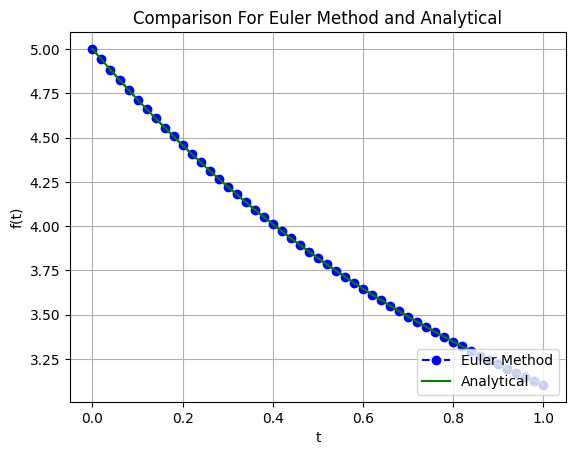

In [ ]:
def rk_03_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
  f=lambda t,y : 2-y
  f_t=lambda t :2+3*np.exp(-t)
  t_0=0
  t_end=1
  # y_true_func=lambda t :2+3*np.exp(-t)
  # y_true=[y_0]
  # y_pred=[y_0]
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  y = np.zeros(len(t))
  y_t =np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  for j in range(len(t)-1):
    k1[j+1]=f(t[j], y[j])
    k2[j+1]=f(t[j]+0.5*dt, y[j]+k1[j+1]*dt*0.5)
    k3[j+1]=f(t[j+1], y[j]+k2[j+1]*dt)
    y[j+1]=y[j]+(1/6*k1[j+1]+4/6*k2[j+1]+1/6*k3[j+1])*dt
    y_t[j+1]=f_t(t[j+1])
    e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100

  if pr==1:
    return t, y_t, y,e
  else:
    df = pd.DataFrame(list(zip(t, y, y_t, e,k1,k2, k3)),
                    columns =['t','y pred', 'y true', 'error(%)','k1','k2', 'k3'])
    display(df)
    plt.plot(t, y, 'bo--', label='Euler Method')
    plt.plot(t, y_t, 'g', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()



### Bagian B

,t,y pred,y true,error(%),k1,k2,k3,k4,k5,k6
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,4.948922,4.940596,0.168519,-3.000000,-2.985000,-2.985037,-2.910449,-2.956007,2.312468
2,0.04,4.898766,4.882368,0.335863,-2.948922,-2.934177,-2.934214,-2.860896,-2.905678,2.307148
3,0.06,4.849517,4.825294,0.502006,-2.898766,-2.884273,-2.884309,-2.812237,-2.856258,2.301924
4,0.08,4.801157,4.769349,0.666923,-2.849517,-2.835269,-2.835305,-2.764458,-2.807731,2.296795
5,0.10,4.753671,4.714512,0.830590,-2.801157,-2.787151,-2.787186,-2.717542,-2.760080,2.291758
6,0.12,4.707042,4.660761,0.992983,-2.753671,-2.739902,-2.739937,-2.671473,-2.713290,2.286812
7,0.14,4.661255,4.608075,1.154078,-2.707042,-2.693507,-2.693540,-2.626236,-2.667345,2.281955
8,0.16,4.616296,4.556431,1.313852,-2.661255,-2.647949,-2.647982,-2.581816,-2.622230,2.277186
9,0.18,4.572149,4.505811,1.472282,-2.616296,-2.603215,-2.603247,-2.538199,-2.577930,2.272503


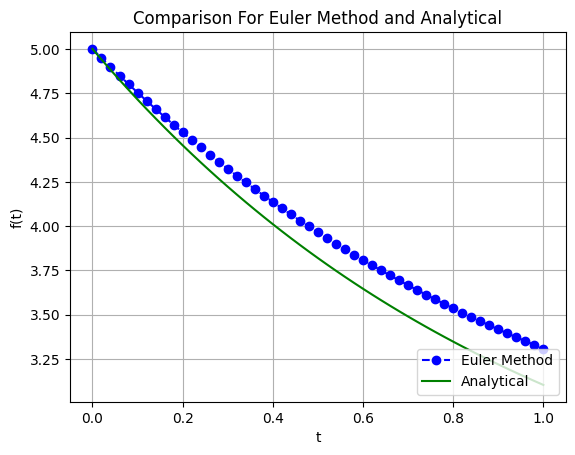

In [ ]:
dt=0.02
f=lambda t,y : 2-y
f_t=lambda t :2+3*np.exp(-t)
t_0=0
t_end=1
# y_true_func=lambda t :2+3*np.exp(-t)
# y_true=[y_0]
# y_pred=[y_0]
H = int((t_end-t_0)/dt)
t=np.linspace(t_0, t_end, H+1)
k1=np.zeros(len(t))
k2=np.zeros(len(t))
k3=np.zeros(len(t))
k4=np.zeros(len(t))
k5=np.zeros(len(t))
k6=np.zeros(len(t))
y = np.zeros(len(t))
y_t =np.zeros(len(t))
e=np.zeros(len(t))
y[0]=5
y_t[0]=5
for j in range(len(t)-1):
  k1[j+1]=f(t[j], y[j])
  k2[j+1]=f(t[j]+0.25*dt, y[j]+k1[j+1]*dt*0.25)
  k3[j+1]=f(t[j]+0.25*dt, y[j]+k1[j+1]*dt*0.125+k2[j+1]*dt*0.125)
  k4[j+1]=f(t[j]+0.5*dt, y[j]+k2[j+1]*dt*0.5+k3[j+1]*dt)
  k5[j+1]=f(t[j]+0.75*dt, y[j]+k1[j+1]*dt*3/16+k4[j+1]*dt*9/16)
  k6[j+1]=f(t[j+1], k1[j+1]*dt*3/7+k2[j+1]*dt*2/7+k3[j+1]*dt*12/7+k4[j+1]*dt*12/7+k5[j+1]*dt*8/7 )
  y[j+1]=y[j]+(7/90*k1[j+1]+32/90*k3[j+1]+12/90*k4[j+1]+32/90*k5[j+1]+7/90*k6[j+1])*dt
  y_t[j+1]=f_t(t[j+1])
  e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100

df = pd.DataFrame(list(zip(t, y, y_t, e,k1,k2, k3,k4,k5,k6)),
                columns =['t','y pred', 'y true', 'error(%)','k1','k2', 'k3', 'k4','k5','k6'])
display(df)
plt.plot(t, y, 'bo--', label='Euler Method')
plt.plot(t, y_t, 'g', label='Analytical')
plt.title('Comparison For Euler Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()



In [ ]:
print(9/18*2)

1.0
